## Description
This is the main documentation for this week's assignment. All the provided files are also accessible and will be maintained via my GitHub [here](https://github.com/ClaasFil/metro_model_deve).

In [65]:
import numpy as np
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
import subprocess
import matplotlib as mpl
import netCDF4 as nc

In [66]:
def read_namelist(relative_path):
    """
    Read a Fortran namelist file and extract parameters from a relative path.

    Parameters:
    relative_path (str): Relative path to the namelist file from the notebook.

    Returns:
    dict: Dictionary of parameters read from the file.
    """
    # Construct the full path using the notebook's directory
    notebook_dir = os.getcwd()  # Gets the directory of the current script
    file_path = os.path.join(notebook_dir, relative_path)  # Constructs the full path

    params = {}
    try:
        with open(file_path, 'r') as file:
            for line in file:
                line = line.strip()
                if line.startswith('&') or line.startswith('/'):
                    continue
                key_value = line.split('=')
                if len(key_value) == 2:
                    key = key_value[0].strip()
                    value = key_value[1].strip().rstrip('/')
                    # Convert numerical values from strings
                    if value.isdigit():
                        value = int(value)
                    else:
                        try:
                            value = float(value)
                        except ValueError:
                            pass  # Keep as string if it's not a number
                    params[key] = value
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' does not exist.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

    return params



In [84]:
import netCDF4 as nc
import numpy as np

def read_and_reshape_temperature_nc(file_name,  nx, ny):
    """
    Read temperature data from a NetCDF file and reshape it into matrices.
    
    Parameters:
        file_name (str): Path to the NetCDF file to read.
        variable_name (str): Name of the variable to extract from the NetCDF file.
        nx (int): Number of rows in each reshaped matrix.
        ny (int): Number of columns in each reshaped matrix.
    
    Returns:
        np.ndarray: An array of reshaped matrices.
    """
    notebook_path = os.getcwd()
    data_path = os.path.join(notebook_path, '../../data', file_name)


    
    # Open the NetCDF file
    dataset = nc.Dataset(data_path, 'r')
    data = dataset.variables['temperature'][:]  # Read all data for the variable
    dataset.close()

    # Ensure the total number of data points is compatible with the reshape dimensions
    if data.size % (nx * ny) != 0:
        raise ValueError("Data size does not match expected dimensions.")

    # Reshape the data
    reshaped_data = data.reshape(-1, ny, nx)

    return reshaped_data # Transpose each matrix for appropriate orientation



In [85]:
def plt_singel_frame(data, title, save=False, save_name='frame.png'):
    """
    Plot a single frame of temperature data.
    
    Parameters:
        data (np.ndarray): 2D array of temperature data.
        title (str): Title of the plot.
        cmap (str): Colormap to use in the plot.
        save (bool): If True, the plot will be saved to a file.
        save_name (str): Name of the file to save the plot.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(data)
    plt.colorbar()
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.tight_layout()
    
    if save:
        plt.savefig(save_name)
    else:
        plt.show()

In [86]:
# Reading the parameters from namelist:

relative_path = '../../data/namelist/ex_7_cos.nml'
parameters = read_namelist(relative_path)
#print(parameters)
nx = parameters['nx']
ny = parameters['ny']

# Results

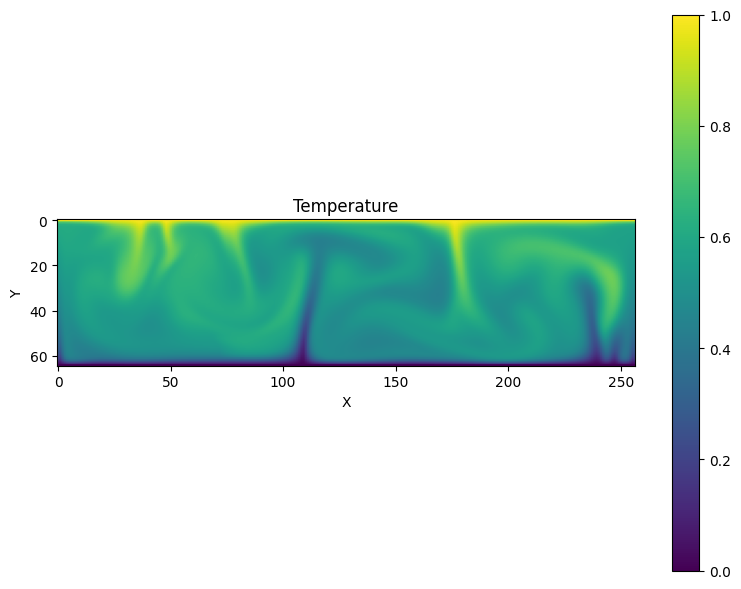

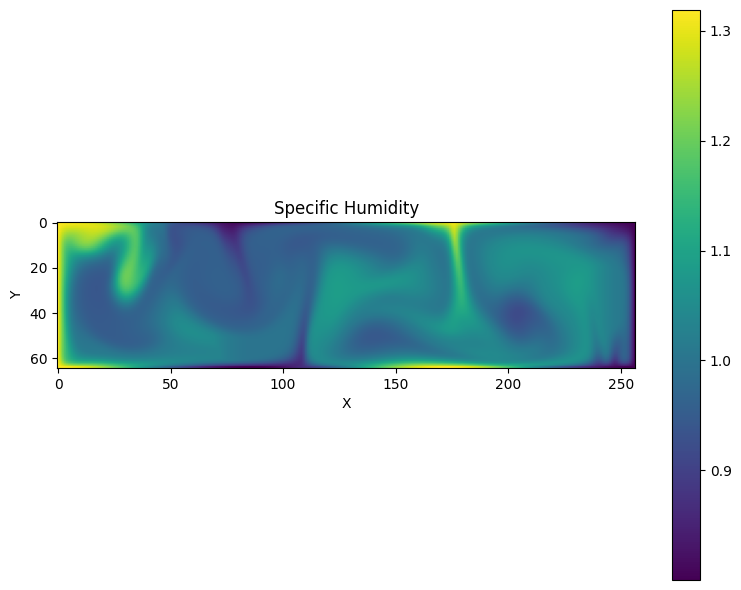

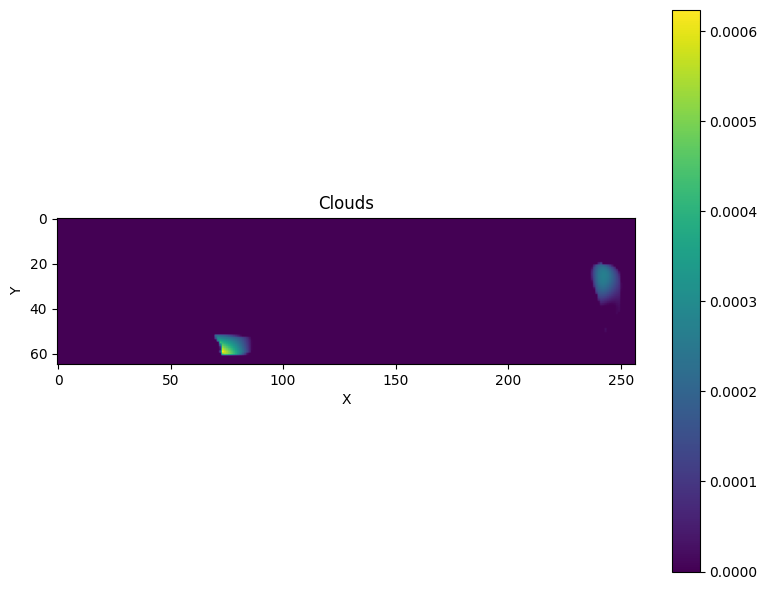

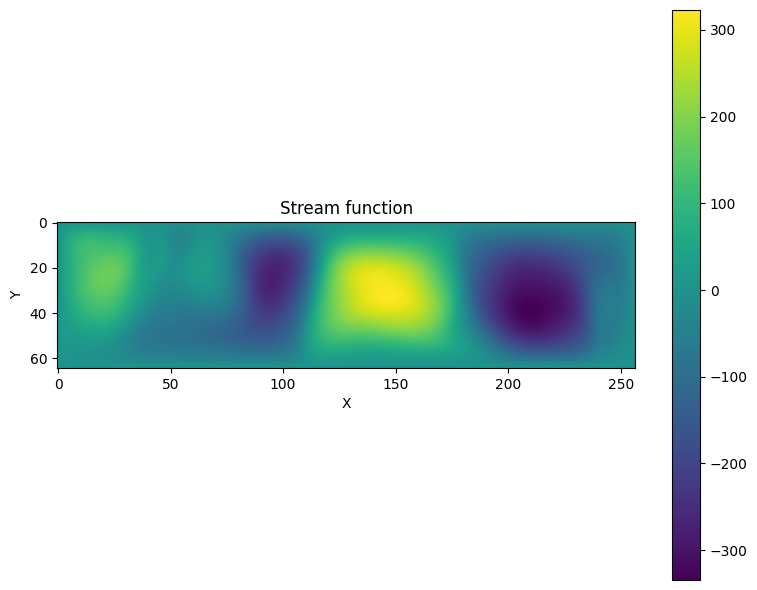

In [87]:
# Plot temperate fields:
T = read_and_reshape_temperature_nc(f'ex_9/T_cos.nc', nx, ny)
q = read_and_reshape_temperature_nc(f'ex_9/q_cos.nc', nx, ny)
C = read_and_reshape_temperature_nc(f'ex_9/C_cos.nc', nx, ny)
psi = read_and_reshape_temperature_nc(f'ex_9/psi_cos.nc', nx, ny)
plt_singel_frame(T[-1], f'Temperature', save=False, save_name=f'frame.png')
plt_singel_frame(q[-1], f'Specific Humidity', save=False, save_name=f'frame.png')
plt_singel_frame(C[-1], f'Clouds', save=False, save_name=f'frame.png')
plt_singel_frame(psi[-1], f'Stream function', save=False, save_name=f'frame.png')


In [71]:
max_C = np.max(C)
min_C = np.min(C)
print(f'Maximum value of C: {max_C}')
print(f'Minimum value of C: {min_C}')

Maximum value of C: 0.0006237386612604438
Minimum value of C: -0.0
